In [61]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df=pd.read_csv("hotel_booking.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [65]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [66]:
categorical = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [67]:
for col in categorical:
    print(f'''Value count colom {col}:''')
    print('-' * 50)
    print(df[col].value_counts())
    print()

Value count colom hotel:
--------------------------------------------------
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Value count colom arrival_date_month:
--------------------------------------------------
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

Value count colom meal:
--------------------------------------------------
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

Value count colom country:
--------------------------------------------------
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

Value count c

In [68]:
df_clean = df.copy()

In [69]:
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,company,112593,94.307
1,agent,16340,13.686
2,country,488,0.409
3,children,4,0.003


In [70]:
df_clean.dropna(subset=['children'], inplace=True)

In [71]:
df_clean['company'] = df_clean['company'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['agent'] = df_clean['agent'].apply(lambda x: 0 if pd.isnull(x) else 1)
df_clean['country'].fillna(df_clean['country'].mode()[0], inplace = True)

In [72]:
df_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [73]:
df_clean['adr'].describe()

count    119386.000000
mean        101.833541
std          50.534664
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [74]:
df_clean.drop(df_clean[df_clean['adr'] < 0].index, inplace = True)

In [75]:
df_clean['adr'].describe()

count    119385.000000
mean        101.834447
std          50.533905
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [76]:
df_clean['adults'].describe()

count    119385.000000
mean          1.856389
std           0.579263
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [77]:
df_clean.drop(df_clean[df_clean['adults'] < 1].index, inplace = True)

In [78]:
df_clean['adults'].describe()

count    118982.000000
mean          1.862677
std           0.570062
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64

In [79]:
df_clean['children'] = df_clean['children'].astype(int)

df_clean['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df_clean['agent'] = df_clean['agent'].astype(int)

df_clean['company'] = df_clean['company'].astype(int)

In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118982 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118982 non-null  object        
 1   is_canceled                     118982 non-null  int64         
 2   lead_time                       118982 non-null  int64         
 3   arrival_date_year               118982 non-null  int64         
 4   arrival_date_month              118982 non-null  object        
 5   arrival_date_week_number        118982 non-null  int64         
 6   arrival_date_day_of_month       118982 non-null  int64         
 7   stays_in_weekend_nights         118982 non-null  int64         
 8   stays_in_week_nights            118982 non-null  int64         
 9   adults                          118982 non-null  int64         
 10  children                        118982 non-null  int32       

In [81]:
df_clean['total_stays'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


In [82]:
df_clean['total_guests'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

In [83]:
df_clean['kids'] = df_clean['children'] + df_clean['babies']


In [84]:
df_clean['guest_location'] = df_clean['country'].apply(lambda x: 'Local' if x == 'PRT' else 'International')
df_clean['guest_location'].value_counts()

guest_location
International    70068
Local            48914
Name: count, dtype: int64

In [85]:
df_clean.drop(['name', 'email', 'phone-number', 'credit_card'], axis = 1, inplace=True)

In [86]:
df_clean.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'children', 'babies'], axis = 1, inplace=True)

In [87]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118982 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118982 non-null  object        
 1   is_canceled                     118982 non-null  int64         
 2   lead_time                       118982 non-null  int64         
 3   arrival_date_year               118982 non-null  int64         
 4   arrival_date_month              118982 non-null  object        
 5   arrival_date_week_number        118982 non-null  int64         
 6   arrival_date_day_of_month       118982 non-null  int64         
 7   adults                          118982 non-null  int64         
 8   meal                            118982 non-null  object        
 9   country                         118982 non-null  object        
 10  market_segment                  118982 non-null  object      

In [88]:
numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_stays',
 'total_guests',
 'kids']

In [89]:
categorical = df_clean.select_dtypes(exclude=[np.number]).columns.tolist()
categorical

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'guest_location']

In [90]:
df_clean.drop(df_clean[df_clean['adr'] > 5000].index, inplace = True)

In [91]:
df_clean['previous_cancellations'] = df_clean['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)
df_clean['previous_cancellations'].value_counts()

previous_cancellations
0    112504
1      6477
Name: count, dtype: int64

In [92]:
df_clean['booking_changes'] = df_clean['booking_changes'].apply(lambda x: 0 if x == 0 else 1)
df_clean['booking_changes'].value_counts()

booking_changes
0    101062
1     17919
Name: count, dtype: int64

In [93]:
df_insight = df_clean.copy()

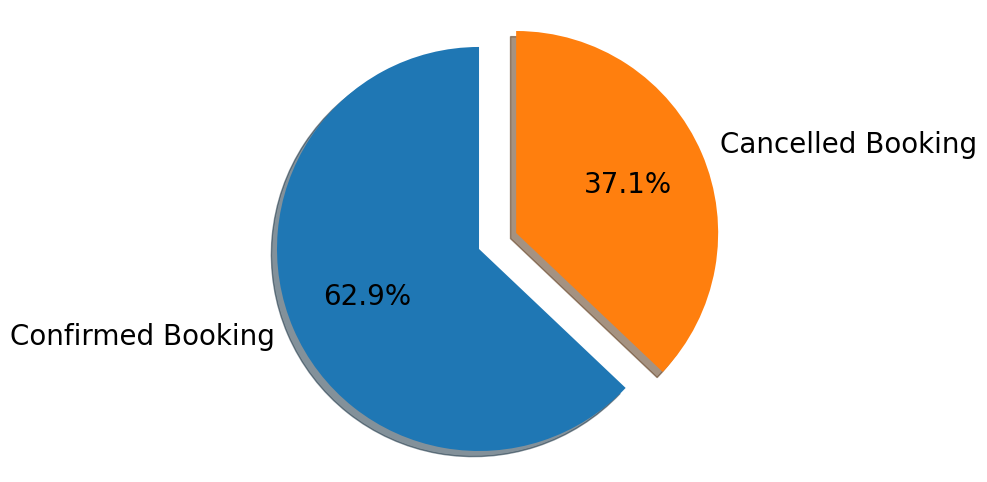

In [94]:
labels = ['Confirmed Booking',  'Cancelled Booking']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df_insight['is_canceled'].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal') 
plt.show()

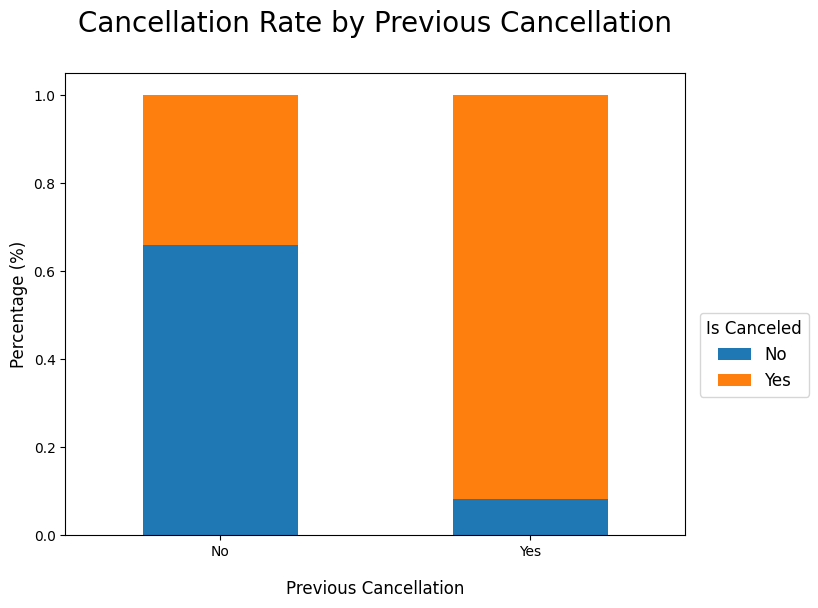

In [95]:
previous_ax = pd.crosstab(df_insight['previous_cancellations'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,6))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    

    
plt.title('Cancellation Rate by Previous Cancellation', fontsize=20, pad=30)   
previous_ax.set_xticklabels(['No','Yes'], rotation=360) 
plt.xlabel('Previous Cancellation', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

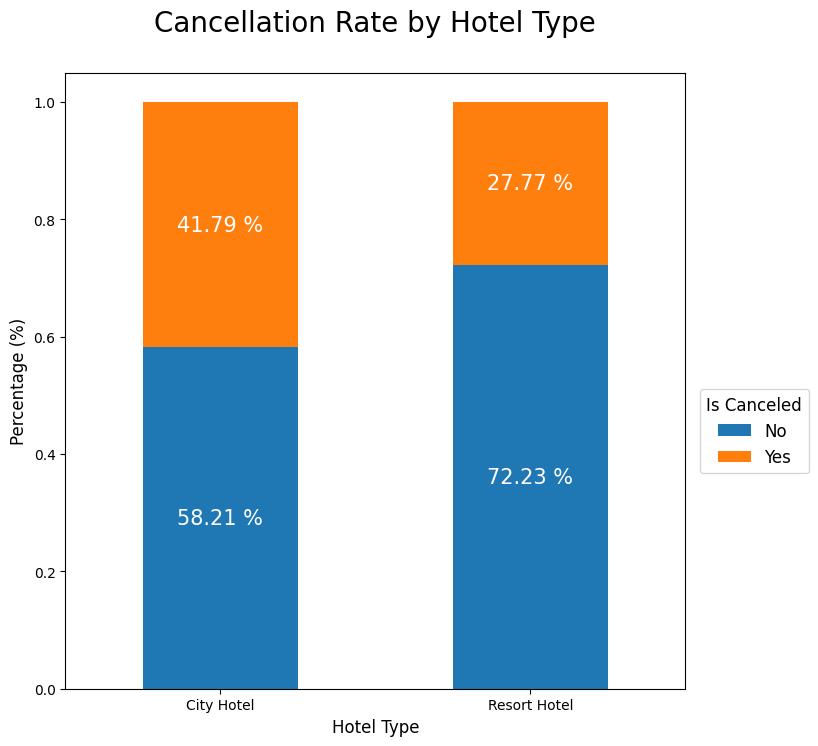

In [39]:
hotel_ax = pd.crosstab(df_insight['hotel'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in hotel_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    hotel_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Hotel Type', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

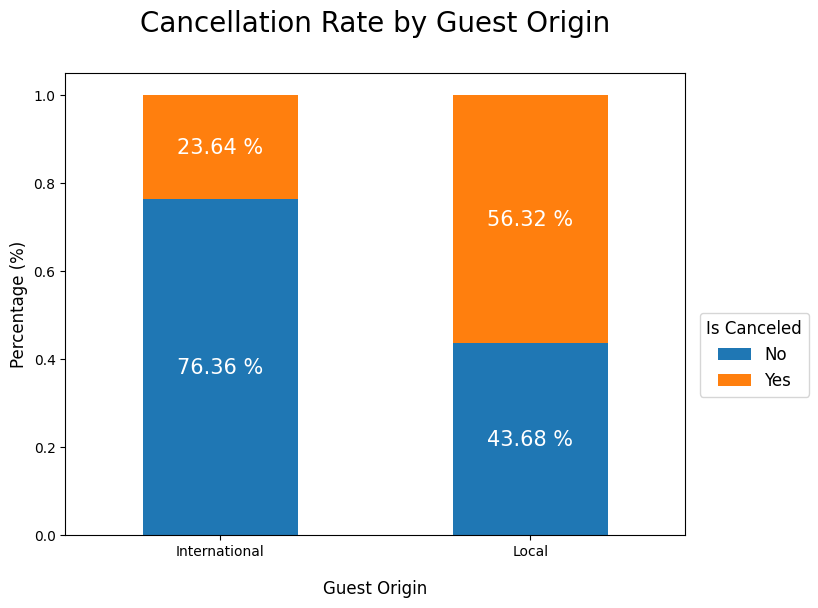

In [59]:
guest_ax = pd.crosstab(df_insight['guest_location'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,6))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in guest_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    guest_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
    
plt.title('Cancellation Rate by Guest Origin', fontsize=20, pad=30)   
plt.xticks(rotation=360) 
plt.xlabel('Guest Origin', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

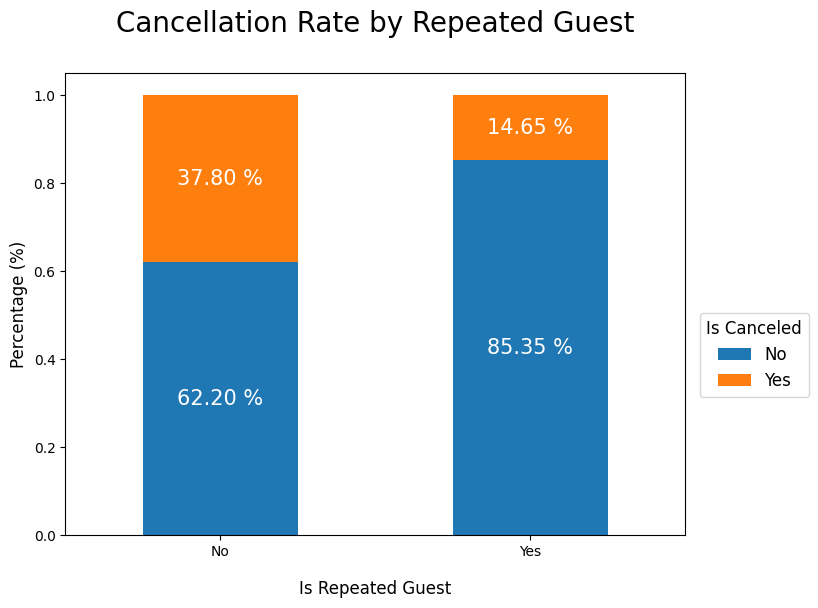

In [58]:
repeat_ax = pd.crosstab(df_insight['is_repeated_guest'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,6))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in repeat_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    repeat_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=15)
plt.title('Cancellation Rate by Repeated Guest', fontsize=20, pad=30)    
repeat_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Is Repeated Guest', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()    

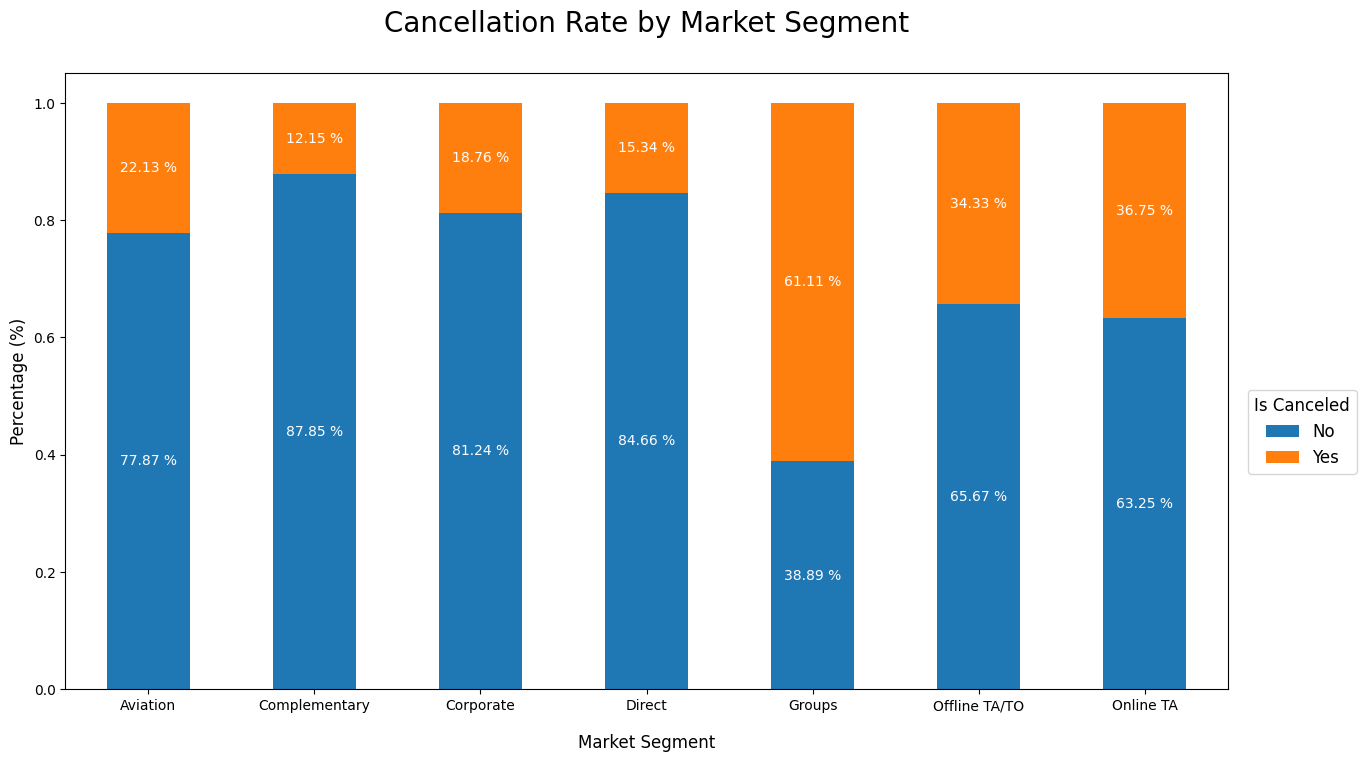

In [43]:
market_ax = pd.crosstab(df_insight['market_segment'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
for p in market_ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    market_ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height*100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='white', fontsize=10)
    
plt.title('Cancellation Rate by Market Segment', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Market Segment', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

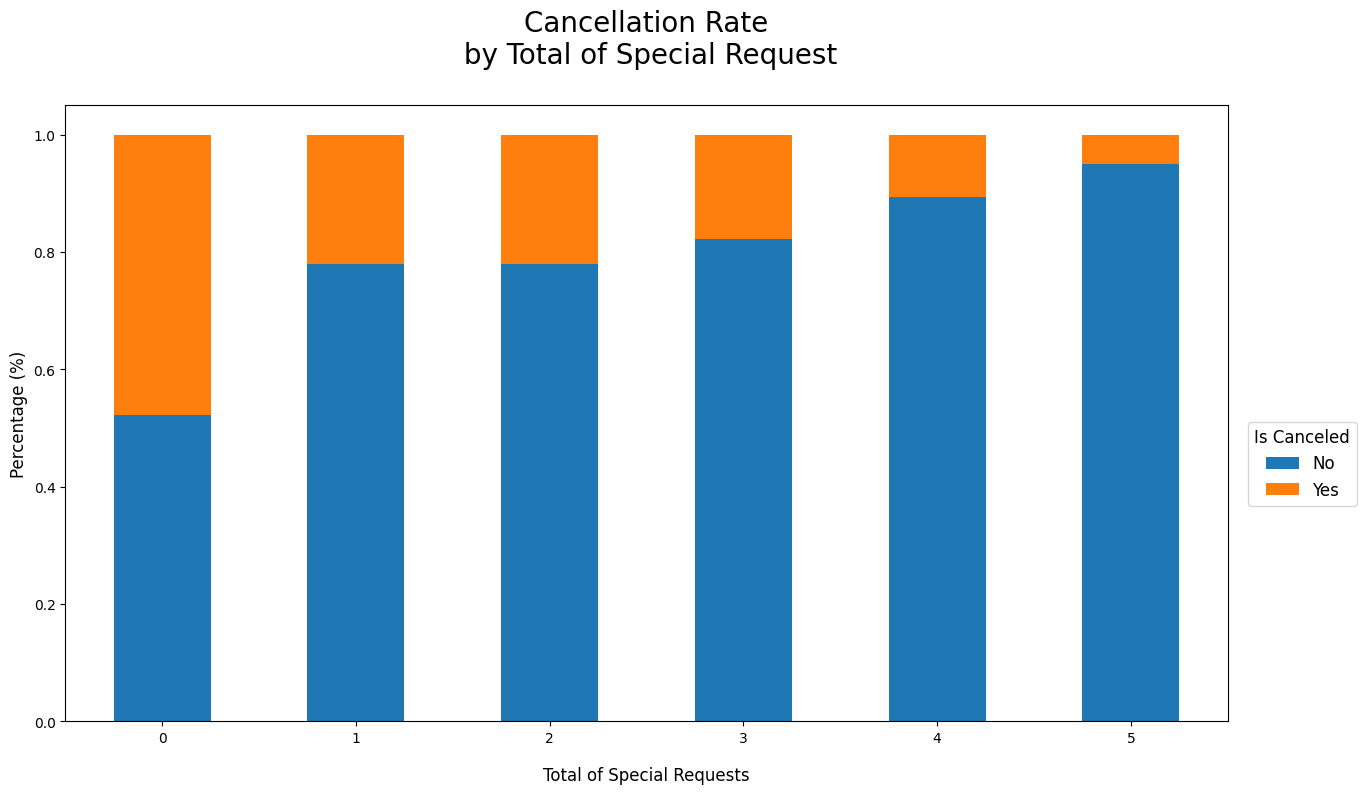

In [44]:
request_ax = pd.crosstab(df_insight['total_of_special_requests'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

    
plt.title('Cancellation Rate\n by Total of Special Request', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Total of Special Requests', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()


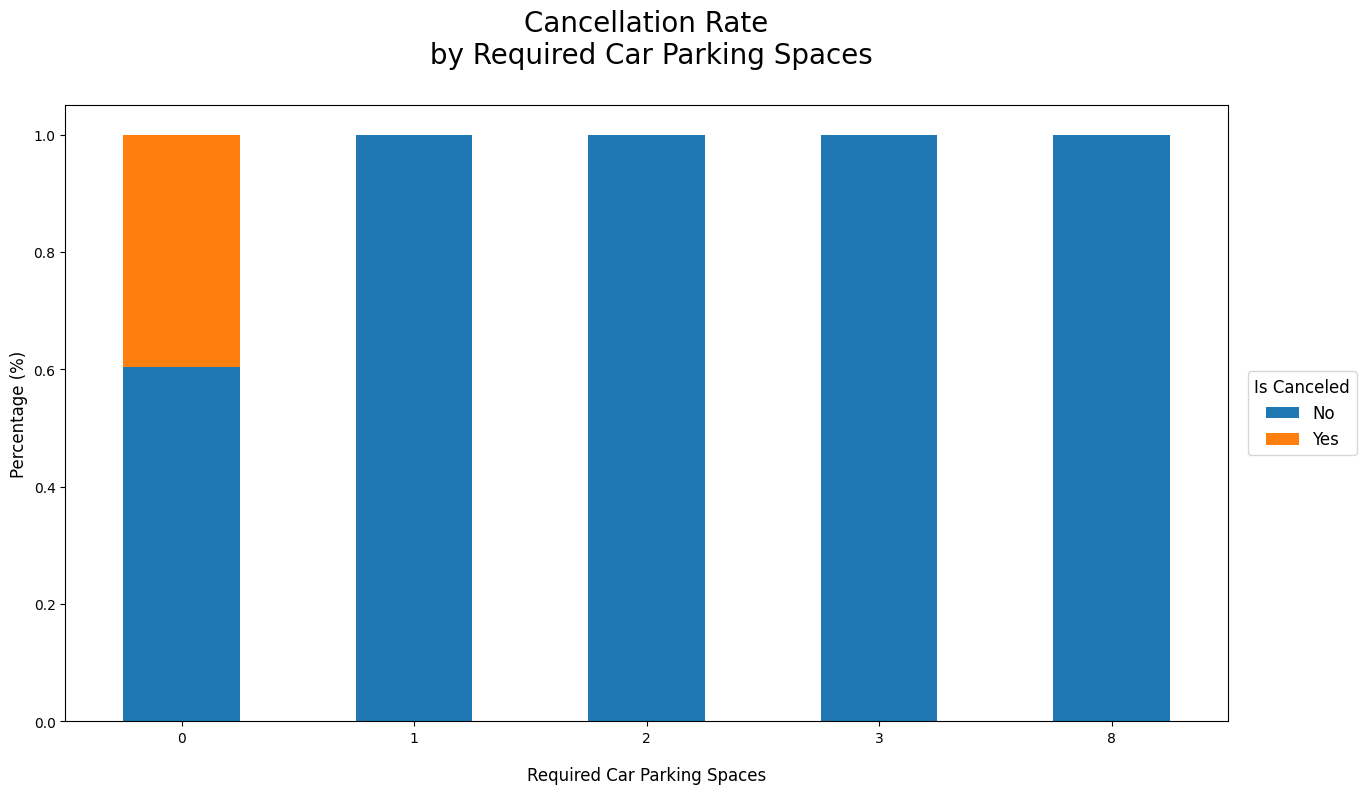

In [45]:
parking_ax = pd.crosstab(df_insight['required_car_parking_spaces'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
    
plt.title('Cancellation Rate\n by Required Car Parking Spaces', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Required Car Parking Spaces', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

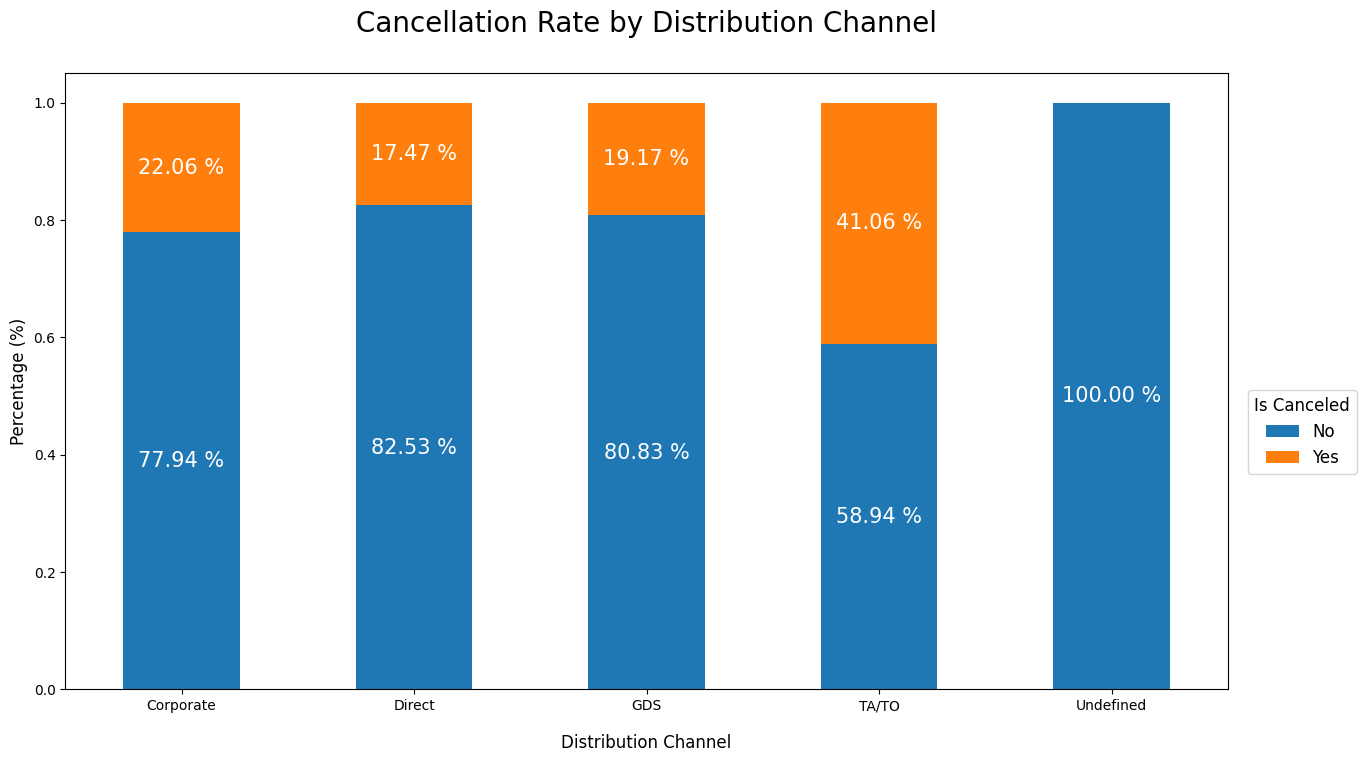

In [46]:
distribution_ax = pd.crosstab(df_insight['distribution_channel'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(15,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])

j = 1   
for p in distribution_ax.patches:
      if j != 10:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        distribution_ax.text(x+width/2, 
                y+height/2, 
                '{:.2f} %'.format(height*100), 
                horizontalalignment='center', 
                verticalalignment='center',
                color='white', fontsize=15)
      j += 1
    
plt.title('Cancellation Rate by Distribution Channel', fontsize=20, pad=30)    
plt.xticks(rotation=360)
plt.xlabel('Distribution Channel', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

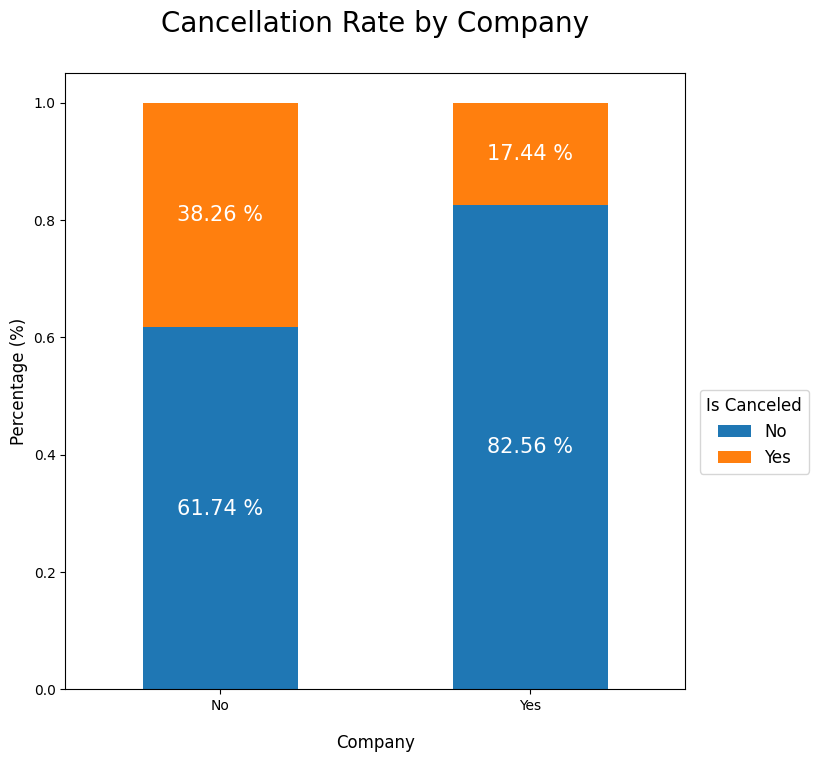

In [47]:
company_ax = pd.crosstab(df_insight['company'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
   
for p in company_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      company_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    
plt.title('Cancellation Rate by Company', fontsize=20, pad=30) 
company_ax.set_xticklabels(['No', 'Yes'], rotation=360)   
plt.xlabel('Company', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

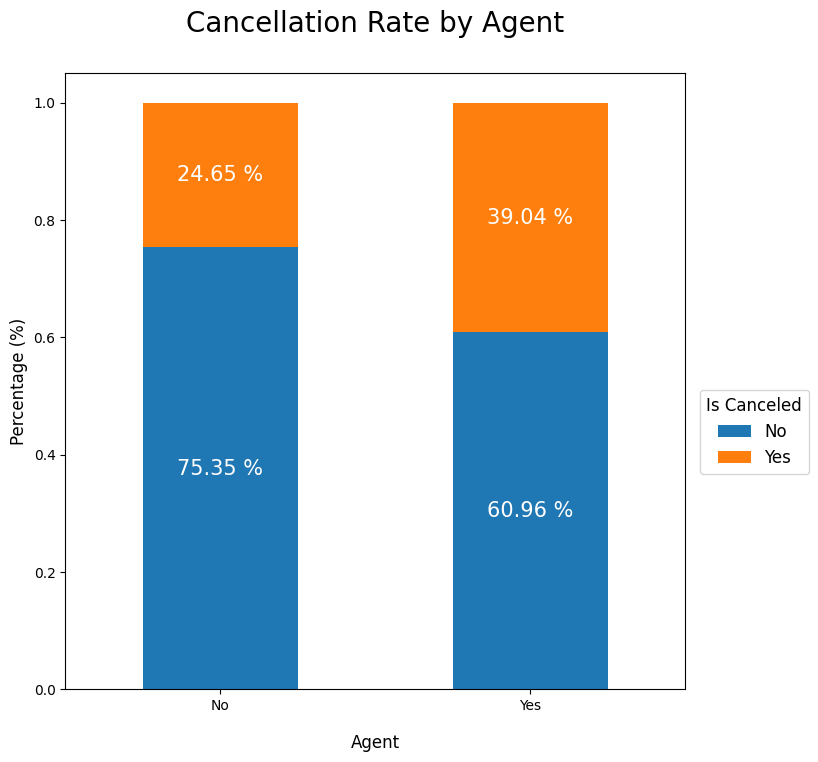

In [48]:
agent_ax = pd.crosstab(df_insight['agent'], df_insight['is_canceled'], normalize = 'index').plot.bar(stacked=True, figsize=(8,8))
plt.legend(bbox_to_anchor=(1.01, 0.5), title='Is Canceled', fontsize=12, title_fontsize=12, labels=['No','Yes'])
   
for p in agent_ax.patches:
      width, height = p.get_width(), p.get_height()
      x, y = p.get_xy() 
      agent_ax.text(x+width/2, 
              y+height/2, 
              '{:.2f} %'.format(height*100), 
              horizontalalignment='center', 
              verticalalignment='center',
              color='white', fontsize=15)
    
plt.title('Cancellation Rate by Agent', fontsize=20, pad=30)    
agent_ax.set_xticklabels(['No', 'Yes'], rotation=360)
plt.xlabel('Agent', fontsize=12, labelpad=15)
plt.ylabel('Percentage (%)', fontsize=12)
plt.show()

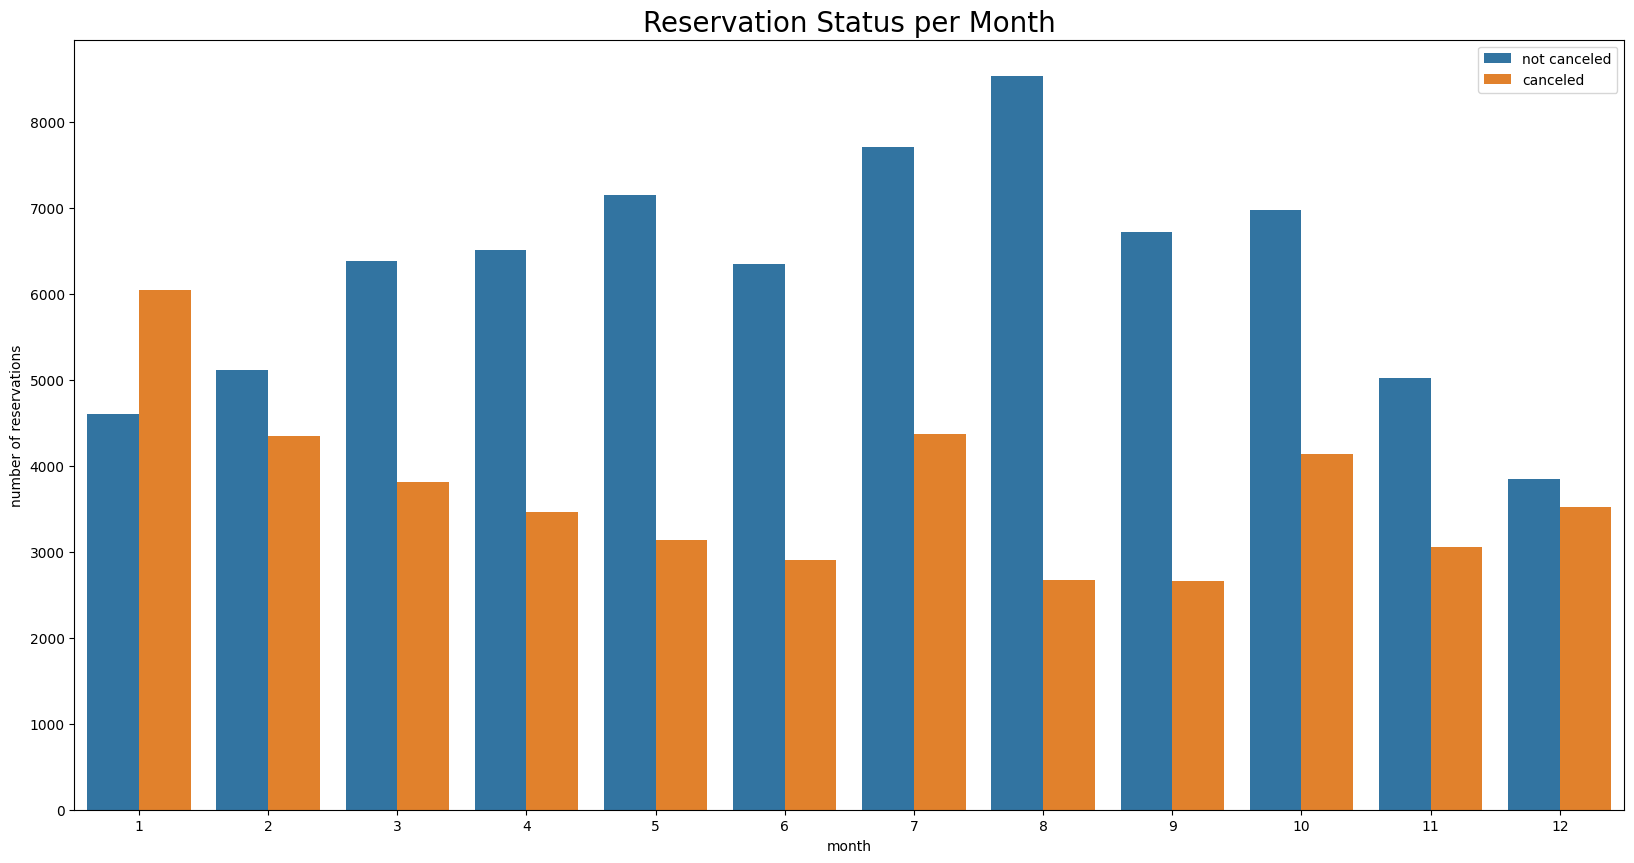

In [49]:
df_insight['month']=df_insight['reservation_status_date'].dt.month
plt.figure(figsize=(20,10))
ax=sns.countplot(x='month',hue='is_canceled',data=df_insight)
legend_labels,_=ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status per Month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled','canceled'])
plt.show()

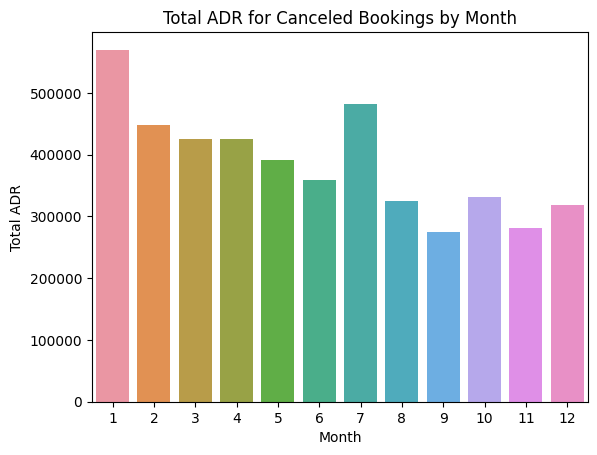

In [50]:
canceled_bookings = df_insight[df_insight['is_canceled'] == 1]

monthly_adr_sum = canceled_bookings.groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month', y='adr', data=monthly_adr_sum)
plt.xlabel('Month')  
plt.ylabel('Total ADR')  
plt.title('Total ADR for Canceled Bookings by Month')  
plt.show()



In [51]:
cancelled_city = df_insight[(df_insight['is_canceled'] == 1) & (df_insight['hotel'] == 'City Hotel')].groupby('month')[['adr']].sum().reset_index()

In [52]:
cancelled_resort = df_insight[(df_insight['is_canceled'] == 1) & (df_insight['hotel'] == 'Resort Hotel')].groupby('month')[['adr']].sum().reset_index()

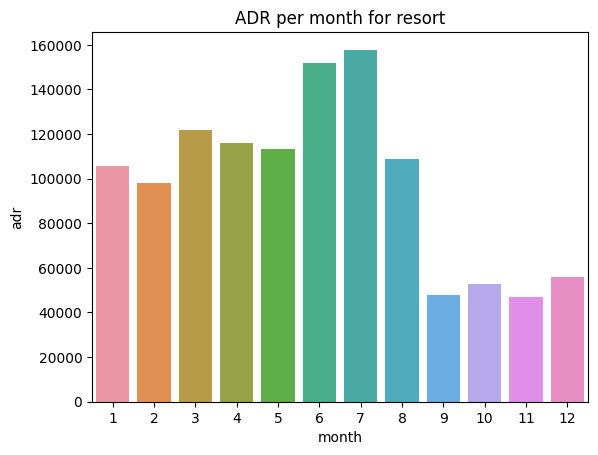

In [53]:
plt.title('ADR per month for resort')
sns.barplot(x = 'month',y = 'adr', data = cancelled_resort)
plt.show()

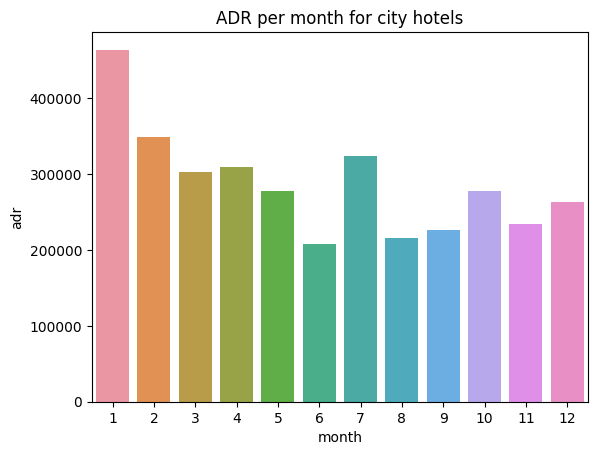

In [54]:
plt.title('ADR per month for city hotels')
sns.barplot(x = 'month',y = 'adr', data = cancelled_city)
plt.show()

In [56]:
import pandas as pd
from scipy import stats

canceled_lead_time = df[df['is_canceled'] == 1]['lead_time']
not_canceled_lead_time = df[df['is_canceled'] == 0]['lead_time']

t_stat, p_value = stats.ttest_ind(canceled_lead_time, not_canceled_lead_time)
if p_value < 0.05:
    print("The average lead time differs significantly between canceled and non-canceled bookings.")
else:
    print("There is no significant difference in the average lead time between canceled and non-canceled bookings.")

The average lead time differs significantly between canceled and non-canceled bookings.


In [57]:
import pandas as pd
from scipy import stats

monthly_adr = df.groupby('arrival_date_month')['adr']

f_stat, p_value = stats.f_oneway(*[group for name, group in monthly_adr])
if p_value < 0.05:
    print("Bookings made in different months are associated with different average daily rates (ADR).")
else:
    print("There is no significant difference in ADR among different months.")

Bookings made in different months are associated with different average daily rates (ADR).
